# German Traffic Sign Recognition

In this project I will create a deep learning model to classify images of traffic signs.

In [1]:
import pandas as pd

In [2]:
meta = pd.read_csv("Meta.csv")
meta.head()

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22


In [3]:
meta.shape

(43, 5)

In [4]:
train = pd.read_csv('Train.csv')
train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [5]:
train.shape

(39209, 8)

In [6]:
test = pd.read_csv('Test.csv')
test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [7]:
test.shape

(12630, 8)

## Analyzing

### View an image

Here I will select a random image from Meta, Train and Test collections and display them.

In [8]:
import matplotlib.pyplot as plt
import cv2

def display_im(df):
    imrow = df.sample(1)
    impath = imrow['Path'].iloc[0] # iloc[0] to get the text value from pd.Series
    imclass = imrow['ClassId'].iloc[0]
    im = cv2.cvtColor(cv2.imread(impath), cv2.COLOR_BGR2RGB) # Read the image in RGB
    plt.title(f"Showing image: {impath}\nClass: {imclass}\nShape: {im.shape}")
    plt.imshow(im);

#### Train

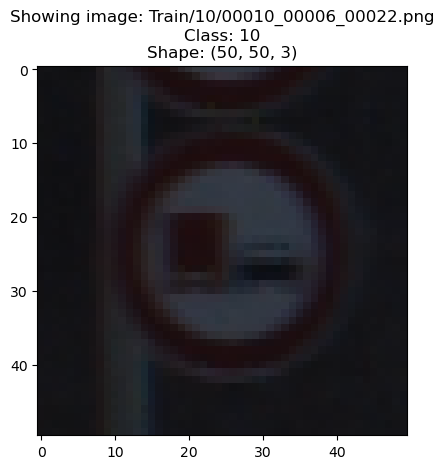

In [9]:
display_im(train)

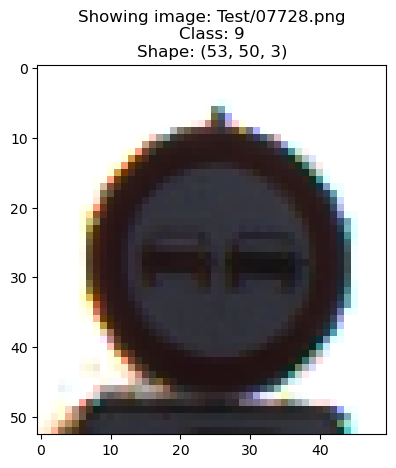

In [10]:
display_im(test)

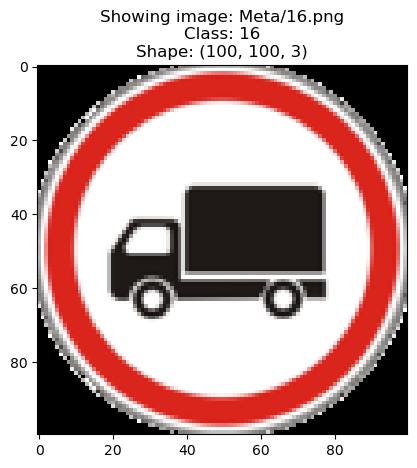

In [11]:
display_im(meta)

## Preprocessing

In this step we will process the images to get them into a suitable form for the model.

The following operations will be done:

1. Read the images using opencv
2. Resize the images. We will use 30x30.
3. Scale the images
4. Add all these images into a numpy array.

In [12]:
import numpy as np

def preprocess(images):
    x = []
    for image in images:
        im = cv2.imread(image)
        im = cv2.resize(im, (30, 30))
        im = im / 255.0
        x.append(im)
    return np.array(x)

In [13]:
subset = train.sample(10_000) # Take a sample of train - too much memory consumption
x = preprocess(subset['Path'])

## Modelling

This is where the CNN model will be configured and run.

In [14]:
from sklearn.model_selection import train_test_split as tts
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape

In [15]:
subset['ClassId'].nunique() # Number of classes

43

In [16]:
subset.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
7021,34,34,6,6,29,29,4,Train/4/00004_00019_00001.png
6695,31,31,6,6,25,26,4,Train/4/00004_00008_00005.png
12371,38,37,6,5,33,32,8,Train/8/00008_00007_00011.png
26367,97,88,8,7,89,80,18,Train/18/00018_00026_00027.png
7673,48,49,5,6,43,44,4,Train/4/00004_00040_00023.png


In [17]:
y = subset['ClassId']

In [18]:
x_train, x_test, y_train, y_test = tts(x, y, random_state=42, test_size=.2)

In [19]:
model=Sequential()

model.add(Input(shape=(30, 30, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(43, activation='softmax')) # There are 43 classes in this data

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

2024-05-01 23:15:50.092454: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-05-01 23:15:50.092474: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-05-01 23:15:50.092479: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-05-01 23:15:50.092494: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-01 23:15:50.092507: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [20]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, verbose=1)

Epoch 1/100


2024-05-01 23:15:50.531801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2998 - loss: 2.7699 - val_accuracy: 0.7370 - val_loss: 0.8771
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8193 - loss: 0.6423 - val_accuracy: 0.8785 - val_loss: 0.4186
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9243 - loss: 0.2866 - val_accuracy: 0.9185 - val_loss: 0.3066
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9589 - loss: 0.1560 - val_accuracy: 0.9295 - val_loss: 0.2782
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9695 - loss: 0.1077 - val_accuracy: 0.9440 - val_loss: 0.2152
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9795 - loss: 0.0826 - val_accuracy: 0.9500 - val_loss: 0.2078
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9813 - loss: 0.0742 - val_accuracy: 0.9490 - val_loss: 0.2316
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9910 - loss: 0.0398 - val_accuracy

In [21]:
model.save('capstone.keras')